In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from numpy import pi, sin,cos, arctan2, sqrt
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from kmeans2 import KMeansAlgorithm

flname="../dataset_cluster_warehouse_exp_2.csv"
df = pd.read_csv(flname)

# add distancce in dataframe from current loc

data_lat = []
data_long = []
for idx, row in df.iterrows():
    point = row['lat_long'].split(',')
    lat = float(point[0])
    long = float(point[1])
    data_lat.append(lat)
    data_long.append(long)

df = df.assign(lat=data_lat, long=data_long)
dataset = df[['city_name', 'district_name', 'avg_demand_baseline', 'demand_target', 'lat', 'long']]
dataset

,city_name,district_name,avg_demand_baseline,demand_target,lat,long
0,KOTA ADMINISTRASI JAKARTA BARAT,CENGKARENG,57,85.5,-6.137270,106.715359
1,KOTA ADMINISTRASI JAKARTA BARAT,CENGKARENG,33,49.5,-6.138586,106.729305
2,KOTA ADMINISTRASI JAKARTA BARAT,CENGKARENG,25,37.5,-6.171504,106.705650
3,KOTA ADMINISTRASI JAKARTA BARAT,CENGKARENG,40,60.0,-6.161334,106.729452
4,KOTA ADMINISTRASI JAKARTA BARAT,GROGOL PETAMBURAN,153,229.5,-6.159495,106.789742
...,...,...,...,...,...,...
185,KOTA ADMINISTRASI JAKARTA PUSAT,TANAH ABANG,45,67.5,-6.185295,106.807314
186,KOTA ADMINISTRASI JAKARTA PUSAT,TANAH ABANG,240,360.0,-6.207670,106.807536
187,KOTA ADMINISTRASI JAKARTA PUSAT,TANAH ABANG,99,148.5,-6.190625,106.807264
188,KOTA ADMINISTRASI JAKARTA PUSAT,TANAH ABANG,37,55.5,-6.196830,106.807479


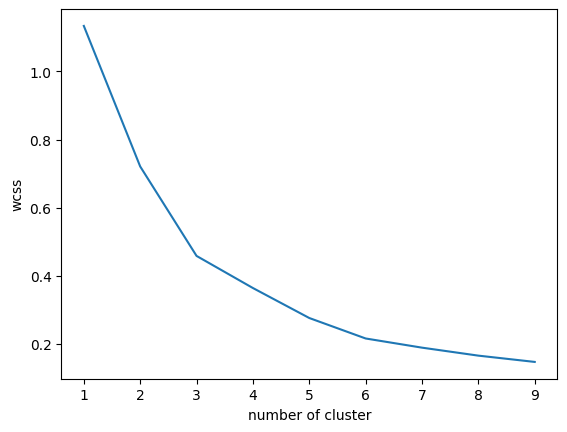

In [2]:
# doing elbow method
train1_dataset = dataset[['lat', 'long']]
wcss = []
crange = 10
for i in range(1, crange):
    kmeans = KMeans(n_clusters=i, init='random', random_state=50)
    kmeans.fit(train1_dataset)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, crange), wcss)
plt.xlabel("number of cluster")
plt.ylabel("wcss")
plt.show()

## Clustering part 1

In [3]:
n_cluster_1 = 3
km = KMeans(n_clusters=n_cluster_1, init='random', random_state=50)
km.fit(train1_dataset)

KMeans(init='random', n_clusters=3, random_state=50)

In [4]:
clusters_1 = km.cluster_centers_
print(clusters_1)

[[ -6.17889247 106.76534925]
 [ -6.27684153 106.8230035 ]
 [ -6.18237458 106.86068425]]


In [5]:
y_km = km.fit_predict(train1_dataset)
dataset = dataset.assign(pred1=y_km)
dataset

,city_name,district_name,avg_demand_baseline,demand_target,lat,long,pred1
0,KOTA ADMINISTRASI JAKARTA BARAT,CENGKARENG,57,85.5,-6.137270,106.715359,0
1,KOTA ADMINISTRASI JAKARTA BARAT,CENGKARENG,33,49.5,-6.138586,106.729305,0
2,KOTA ADMINISTRASI JAKARTA BARAT,CENGKARENG,25,37.5,-6.171504,106.705650,0
3,KOTA ADMINISTRASI JAKARTA BARAT,CENGKARENG,40,60.0,-6.161334,106.729452,0
4,KOTA ADMINISTRASI JAKARTA BARAT,GROGOL PETAMBURAN,153,229.5,-6.159495,106.789742,0
...,...,...,...,...,...,...,...
185,KOTA ADMINISTRASI JAKARTA PUSAT,TANAH ABANG,45,67.5,-6.185295,106.807314,0
186,KOTA ADMINISTRASI JAKARTA PUSAT,TANAH ABANG,240,360.0,-6.207670,106.807536,0
187,KOTA ADMINISTRASI JAKARTA PUSAT,TANAH ABANG,99,148.5,-6.190625,106.807264,0
188,KOTA ADMINISTRASI JAKARTA PUSAT,TANAH ABANG,37,55.5,-6.196830,106.807479,0


In [6]:
n_cluster_2 = 2
dataset_columns= dataset.columns.tolist()
dataset_columns.append("pred2")
new_dataset = pd.DataFrame(columns=dataset_columns)
centroid_2 = []
for c in range(n_cluster_1):
    #filter dataset first
    dset = dataset[dataset.pred1 == c]
    dset_train = dset[['avg_demand_baseline', 'demand_target']]

    #Scale data first
    scaler = StandardScaler()
    scaled_dataset = scaler.fit_transform(dset_train)
    scaled_dataset = pd.DataFrame(scaled_dataset, columns=["avg_demand_baseline", "demand_target"])

    #Doing KMeans clustering
    kmeans = KMeans(n_clusters=n_cluster_2, init='random', random_state=50)
    kmeans.fit(scaled_dataset)
    prediction = kmeans.predict(scaled_dataset)
    dset = dset.assign(pred2=prediction)

    new_dataset = pd.concat([new_dataset, dset])

In [7]:
dataset = new_dataset
dataset

,city_name,district_name,avg_demand_baseline,demand_target,lat,long,pred1,pred2
0,KOTA ADMINISTRASI JAKARTA BARAT,CENGKARENG,57,85.5,-6.137270,106.715359,0,1
1,KOTA ADMINISTRASI JAKARTA BARAT,CENGKARENG,33,49.5,-6.138586,106.729305,0,1
2,KOTA ADMINISTRASI JAKARTA BARAT,CENGKARENG,25,37.5,-6.171504,106.705650,0,1
3,KOTA ADMINISTRASI JAKARTA BARAT,CENGKARENG,40,60.0,-6.161334,106.729452,0,1
4,KOTA ADMINISTRASI JAKARTA BARAT,GROGOL PETAMBURAN,153,229.5,-6.159495,106.789742,0,0
...,...,...,...,...,...,...,...,...
178,KOTA ADMINISTRASI JAKARTA PUSAT,SAWAH BESAR,80,120.0,-6.142170,106.819051,2,1
179,KOTA ADMINISTRASI JAKARTA PUSAT,SAWAH BESAR,76,114.0,-6.166340,106.825129,2,1
180,KOTA ADMINISTRASI JAKARTA PUSAT,SENEN,54,81.0,-6.182720,106.842267,2,1
181,KOTA ADMINISTRASI JAKARTA PUSAT,SENEN,46,69.0,-6.182855,106.835717,2,1


In [8]:
final_prediction = []
for i, data in dataset.iterrows():
    fpred = (data['pred1']*2)+data['pred2']
    final_prediction.append(fpred)
dataset = dataset.assign(final_prediction = final_prediction)
dataset

,city_name,district_name,avg_demand_baseline,demand_target,lat,long,pred1,pred2,final_prediction
0,KOTA ADMINISTRASI JAKARTA BARAT,CENGKARENG,57,85.5,-6.137270,106.715359,0,1,1
1,KOTA ADMINISTRASI JAKARTA BARAT,CENGKARENG,33,49.5,-6.138586,106.729305,0,1,1
2,KOTA ADMINISTRASI JAKARTA BARAT,CENGKARENG,25,37.5,-6.171504,106.705650,0,1,1
3,KOTA ADMINISTRASI JAKARTA BARAT,CENGKARENG,40,60.0,-6.161334,106.729452,0,1,1
4,KOTA ADMINISTRASI JAKARTA BARAT,GROGOL PETAMBURAN,153,229.5,-6.159495,106.789742,0,0,0
...,...,...,...,...,...,...,...,...,...
178,KOTA ADMINISTRASI JAKARTA PUSAT,SAWAH BESAR,80,120.0,-6.142170,106.819051,2,1,5
179,KOTA ADMINISTRASI JAKARTA PUSAT,SAWAH BESAR,76,114.0,-6.166340,106.825129,2,1,5
180,KOTA ADMINISTRASI JAKARTA PUSAT,SENEN,54,81.0,-6.182720,106.842267,2,1,5
181,KOTA ADMINISTRASI JAKARTA PUSAT,SENEN,46,69.0,-6.182855,106.835717,2,1,5


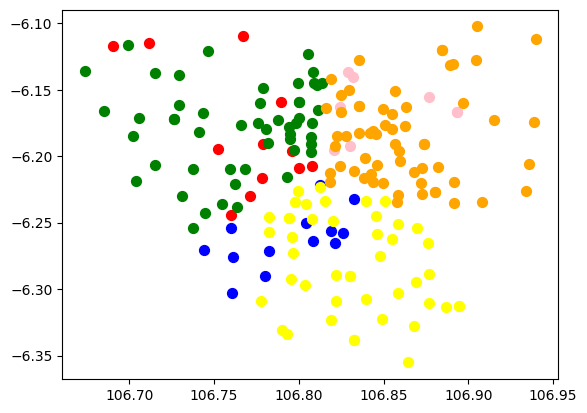

In [9]:
label_a = ("long",1)
label_b = ("lat", 0)
color_list = ["red", "green", "blue", "yellow", "pink", "orange", "purple"]
for i in range(n_cluster_1*n_cluster_2):
    plt.scatter(dataset[dataset.final_prediction==i][label_a[0]], dataset[dataset.final_prediction==i][label_b[0]], s=50, color=color_list[i%len(color_list)])
    #plt.scatter(clusters[i][label_a[1]], clusters[i][label_b[1]], marker="*", s=200, color="black")

plt.show()